In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score,precision_score,accuracy_score,f1_score
import missingno as msno
from sklearn.preprocessing import MinMaxScaler,OrdinalEncoder,OneHotEncoder,PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression

from imblearn.under_sampling import NearMiss
from sklearn.svm import SVC
from sklearn.preprocessing import KBinsDiscretizer
import warnings
warnings.simplefilter(action='ignore', category=[FutureWarning,UserWarning])
from sklearn.model_selection import KFold,GridSearchCV,train_test_split
c



In [2]:

def custom_combiner(feature, category):
    return str(feature) + "_" + type(category).__name__ + "_" + str(category)

In [3]:
data=pd.read_csv("/home/batuhan-saylam/Desktop/cbddotasks/cbddotask4/salary.csv")

In [4]:
np.random.seed(0)
chosen_idx = np.random.choice(data.index, replace=False, size=2000)
data=data.loc[chosen_idx,:]
data=data.reset_index(drop=True)
data.shape

(2000, 15)

In [5]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,27,Private,177119,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,44,United-States,<=50K
1,27,Private,216481,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,25,Private,256263,Assoc-acdm,12,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
3,46,Private,147640,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,1902,40,United-States,<=50K
4,45,Private,172822,11th,7,Divorced,Transport-moving,Not-in-family,White,Male,0,2824,76,United-States,>50K


<Axes: >

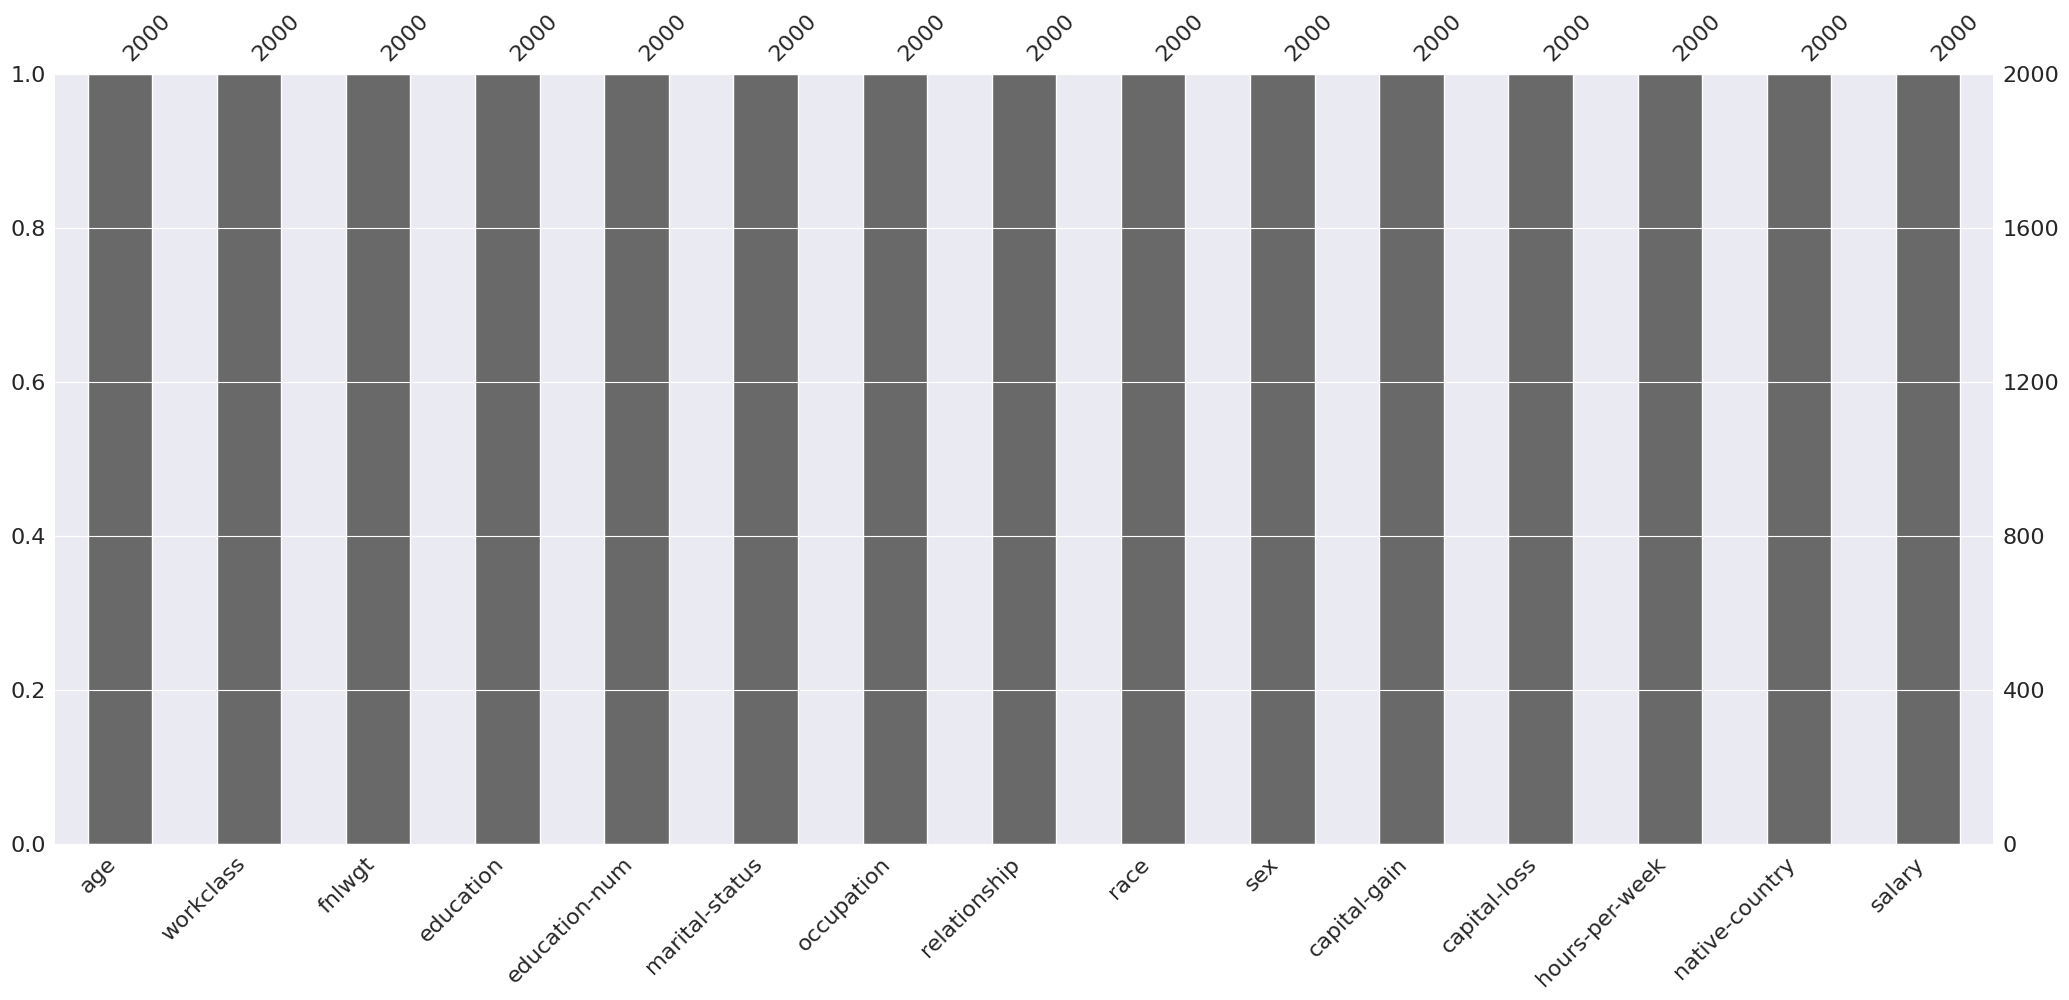

In [6]:
msno.bar(data)

In [7]:
data["salary"].unique()

array([' <=50K', ' >50K'], dtype=object)

In [8]:
enc = OrdinalEncoder(categories=[[" <=50K",' >50K']])
enc.fit(data[["salary"]])
data["salary"] = enc.transform(data[["salary"]])

In [9]:
data["salary"].value_counts()

salary
0.0    1487
1.0     513
Name: count, dtype: int64

In [10]:
data["workclass"].unique()

array([' Private', ' Local-gov', ' ?', ' Federal-gov',
       ' Self-emp-not-inc', ' Self-emp-inc', ' State-gov'], dtype=object)

In [11]:

custom_fnames_enc = OneHotEncoder(feature_name_combiner=custom_combiner).fit(data[["workclass","marital-status","occupation","relationship","race","sex","native-country"]])
data[custom_fnames_enc.get_feature_names_out()]=custom_fnames_enc.transform(data[["workclass","marital-status","occupation","relationship","race","sex","native-country"]]).toarray()
for i in ["workclass","marital-status","occupation","relationship","race","sex","native-country"]:
    data=data.drop(i,axis=1)

In [12]:
data["education"].unique()

array([' Some-college', ' Bachelors', ' Assoc-acdm', ' 5th-6th', ' 11th',
       ' HS-grad', ' Assoc-voc', ' Masters', ' Doctorate', ' Prof-school',
       ' 10th', ' 7th-8th', ' 1st-4th', ' 9th', ' 12th', ' Preschool'],
      dtype=object)

In [13]:
enc = OrdinalEncoder(categories=[[ ' 1st-4th'," 5th-6th",' 7th-8th',' 9th'," 10th"," 11th"," 12th",' HS-grad'," Preschool",' Assoc-acdm',' Assoc-voc',' Some-college'," Bachelors"," Prof-school"," Masters"," Doctorate"]])
enc.fit(data[["education"]])
data["education"] = enc.transform(data[["education"]])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 87 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   age                                        2000 non-null   int64  
 1   fnlwgt                                     2000 non-null   int64  
 2   education                                  2000 non-null   float64
 3   education-num                              2000 non-null   int64  
 4   capital-gain                               2000 non-null   int64  
 5   capital-loss                               2000 non-null   int64  
 6   hours-per-week                             2000 non-null   int64  
 7   salary                                     2000 non-null   float64
 8   workclass_str_ ?                           2000 non-null   float64
 9   workclass_str_ Federal-gov                 2000 non-null   float64
 10  workclass_str_ Local-gov

In [15]:
y=data["salary"]
X=data.drop("salary",axis=1)

In [16]:
undersample = NearMiss(version=3, n_neighbors_ver3=3)
X, y = undersample.fit_resample(X, y)

In [17]:
data2=data[["fnlwgt"]]
X=X.drop("fnlwgt",axis=1)
X=X.drop("capital-gain",axis=1)
X=X.drop("capital-loss",axis=1)

In [18]:
pt = PowerTransformer()
X_new=pt. fit_transform(X)


In [19]:
mms=MinMaxScaler()
X_new=mms.fit_transform(X_new)
X=pd.DataFrame(X_new, columns=X.columns)

In [20]:
fselect = SelectKBest(f_regression, k=1)
X_new=fselect.fit_transform(X, y)

In [21]:
X=pd.DataFrame(X_new, columns=fselect.get_feature_names_out())
X

,marital-status_str_ Married-civ-spouse
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
1021,0.0
1022,1.0
1023,1.0
1024,1.0


array([[<Axes: title={'center': 'marital-status_str_ Married-civ-spouse'}>,
        <Axes: title={'center': 'salary'}>]], dtype=object)

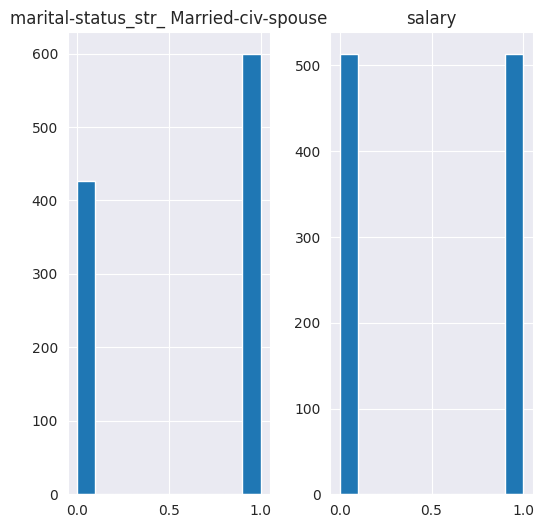

In [22]:
plt.rcParams["figure.figsize"] = (6,6)
pd.concat([X,y],axis=1).hist()

<Axes: >

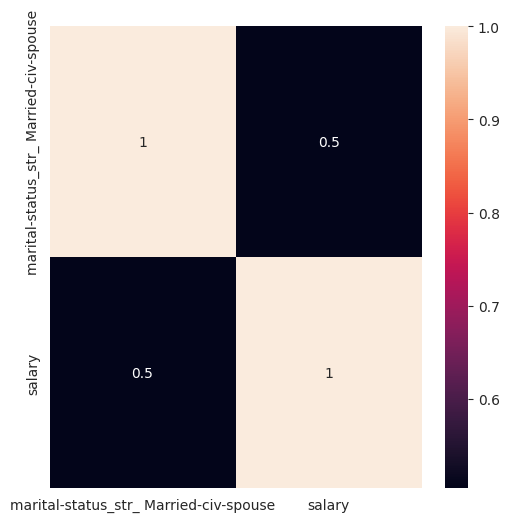

In [23]:
plt.rcParams["figure.figsize"] = (6,6)
sns.heatmap(pd.concat([X,y],axis=1).corr("spearman"),annot=True)

ordinal

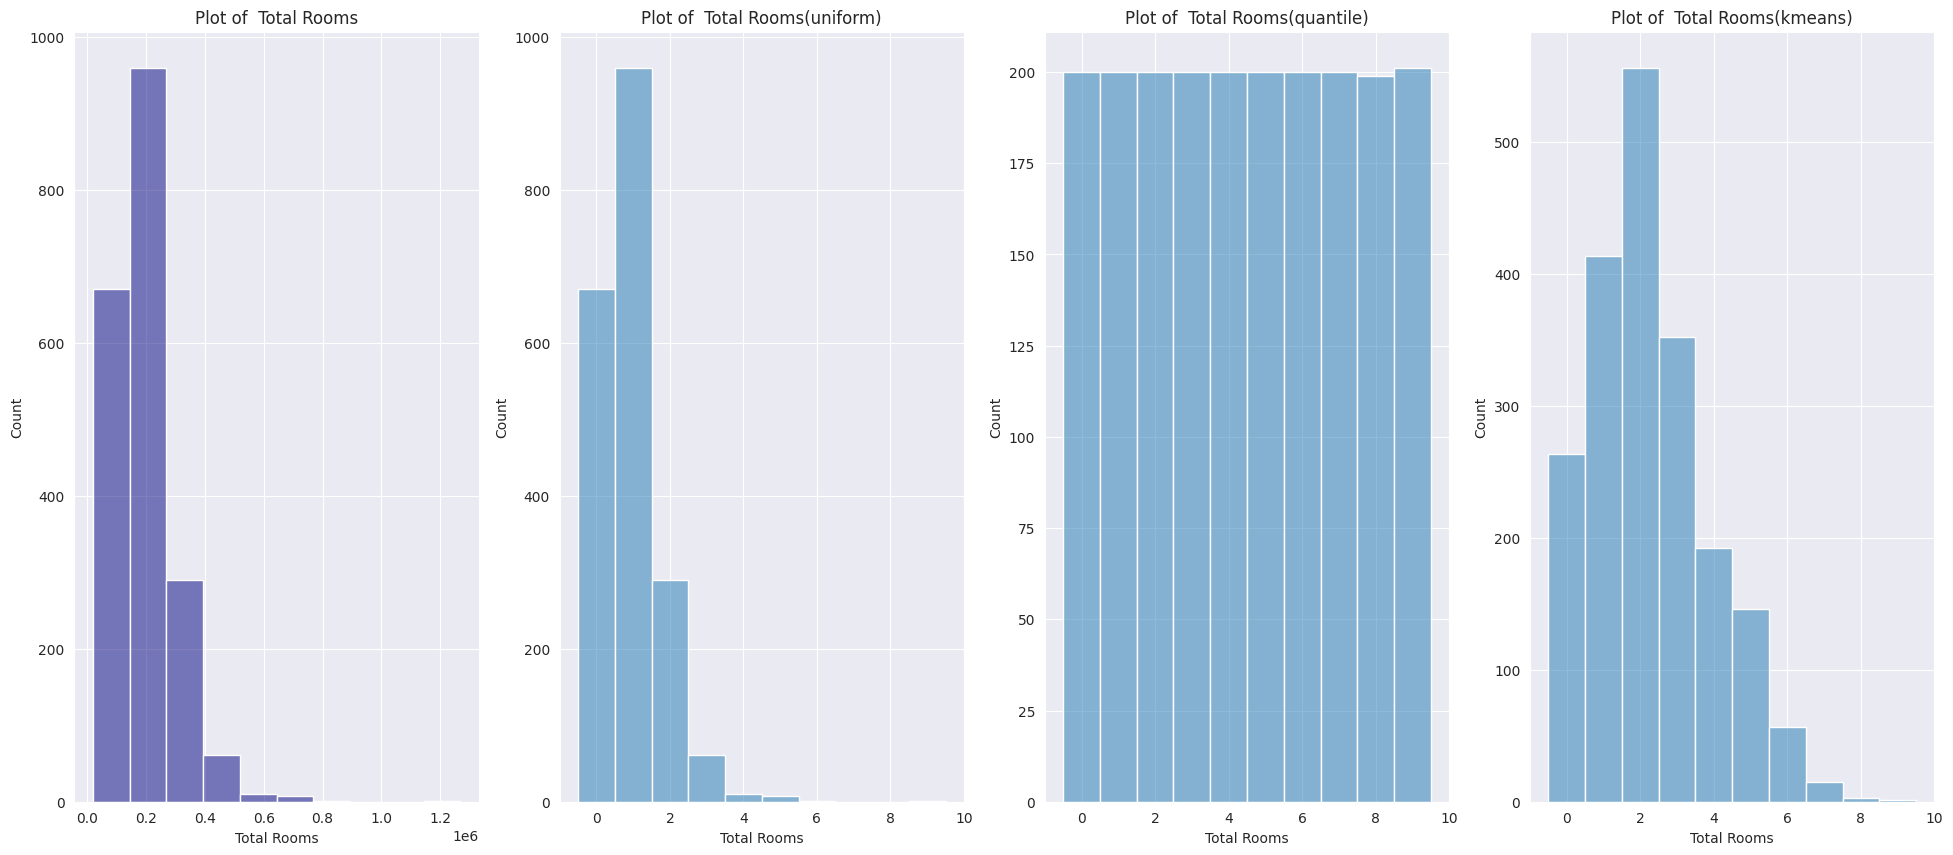

In [24]:
strategies = ["uniform", "quantile", "kmeans"]
newcollist=[]
for i in strategies:
    newcollist+=[j+"_"+i for j in data2.columns.tolist()]
newData=pd.DataFrame(columns=newcollist)

n_bins=10
plt.rcParams["figure.figsize"] = (24,10)
fig, axs = plt.subplots(nrows=1, ncols=4)
sns.histplot(data2["fnlwgt"],bins=n_bins,ax=axs[0],alpha=0.5,color="navy").set(title="Plot of  Total Rooms",xlabel="Total Rooms")

for i, strategy in enumerate(strategies, 1):
    discretizer = KBinsDiscretizer(
        n_bins=n_bins, encode="ordinal", strategy=strategy)
    colist=[j+"_"+strategy for j in data2.columns.tolist()]
    discretizer.fit(data2)
    newData[colist]=discretizer.transform(data2)
    sns.histplot(newData["fnlwgt_"+strategy],bins=n_bins,ax=axs[i],alpha=0.5,discrete=True).set(title=f"Plot of  Total Rooms({strategy})",xlabel="Total Rooms")




<Axes: >

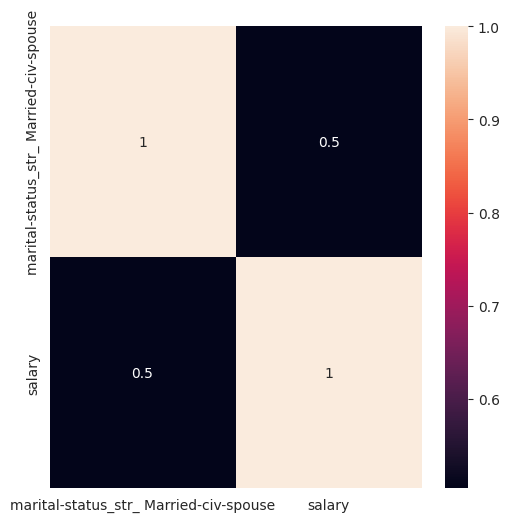

In [25]:
plt.rcParams["figure.figsize"] = (6,6)
sns.heatmap(pd.concat([X,y],axis=1).corr("spearman"),annot=True)

<Axes: >

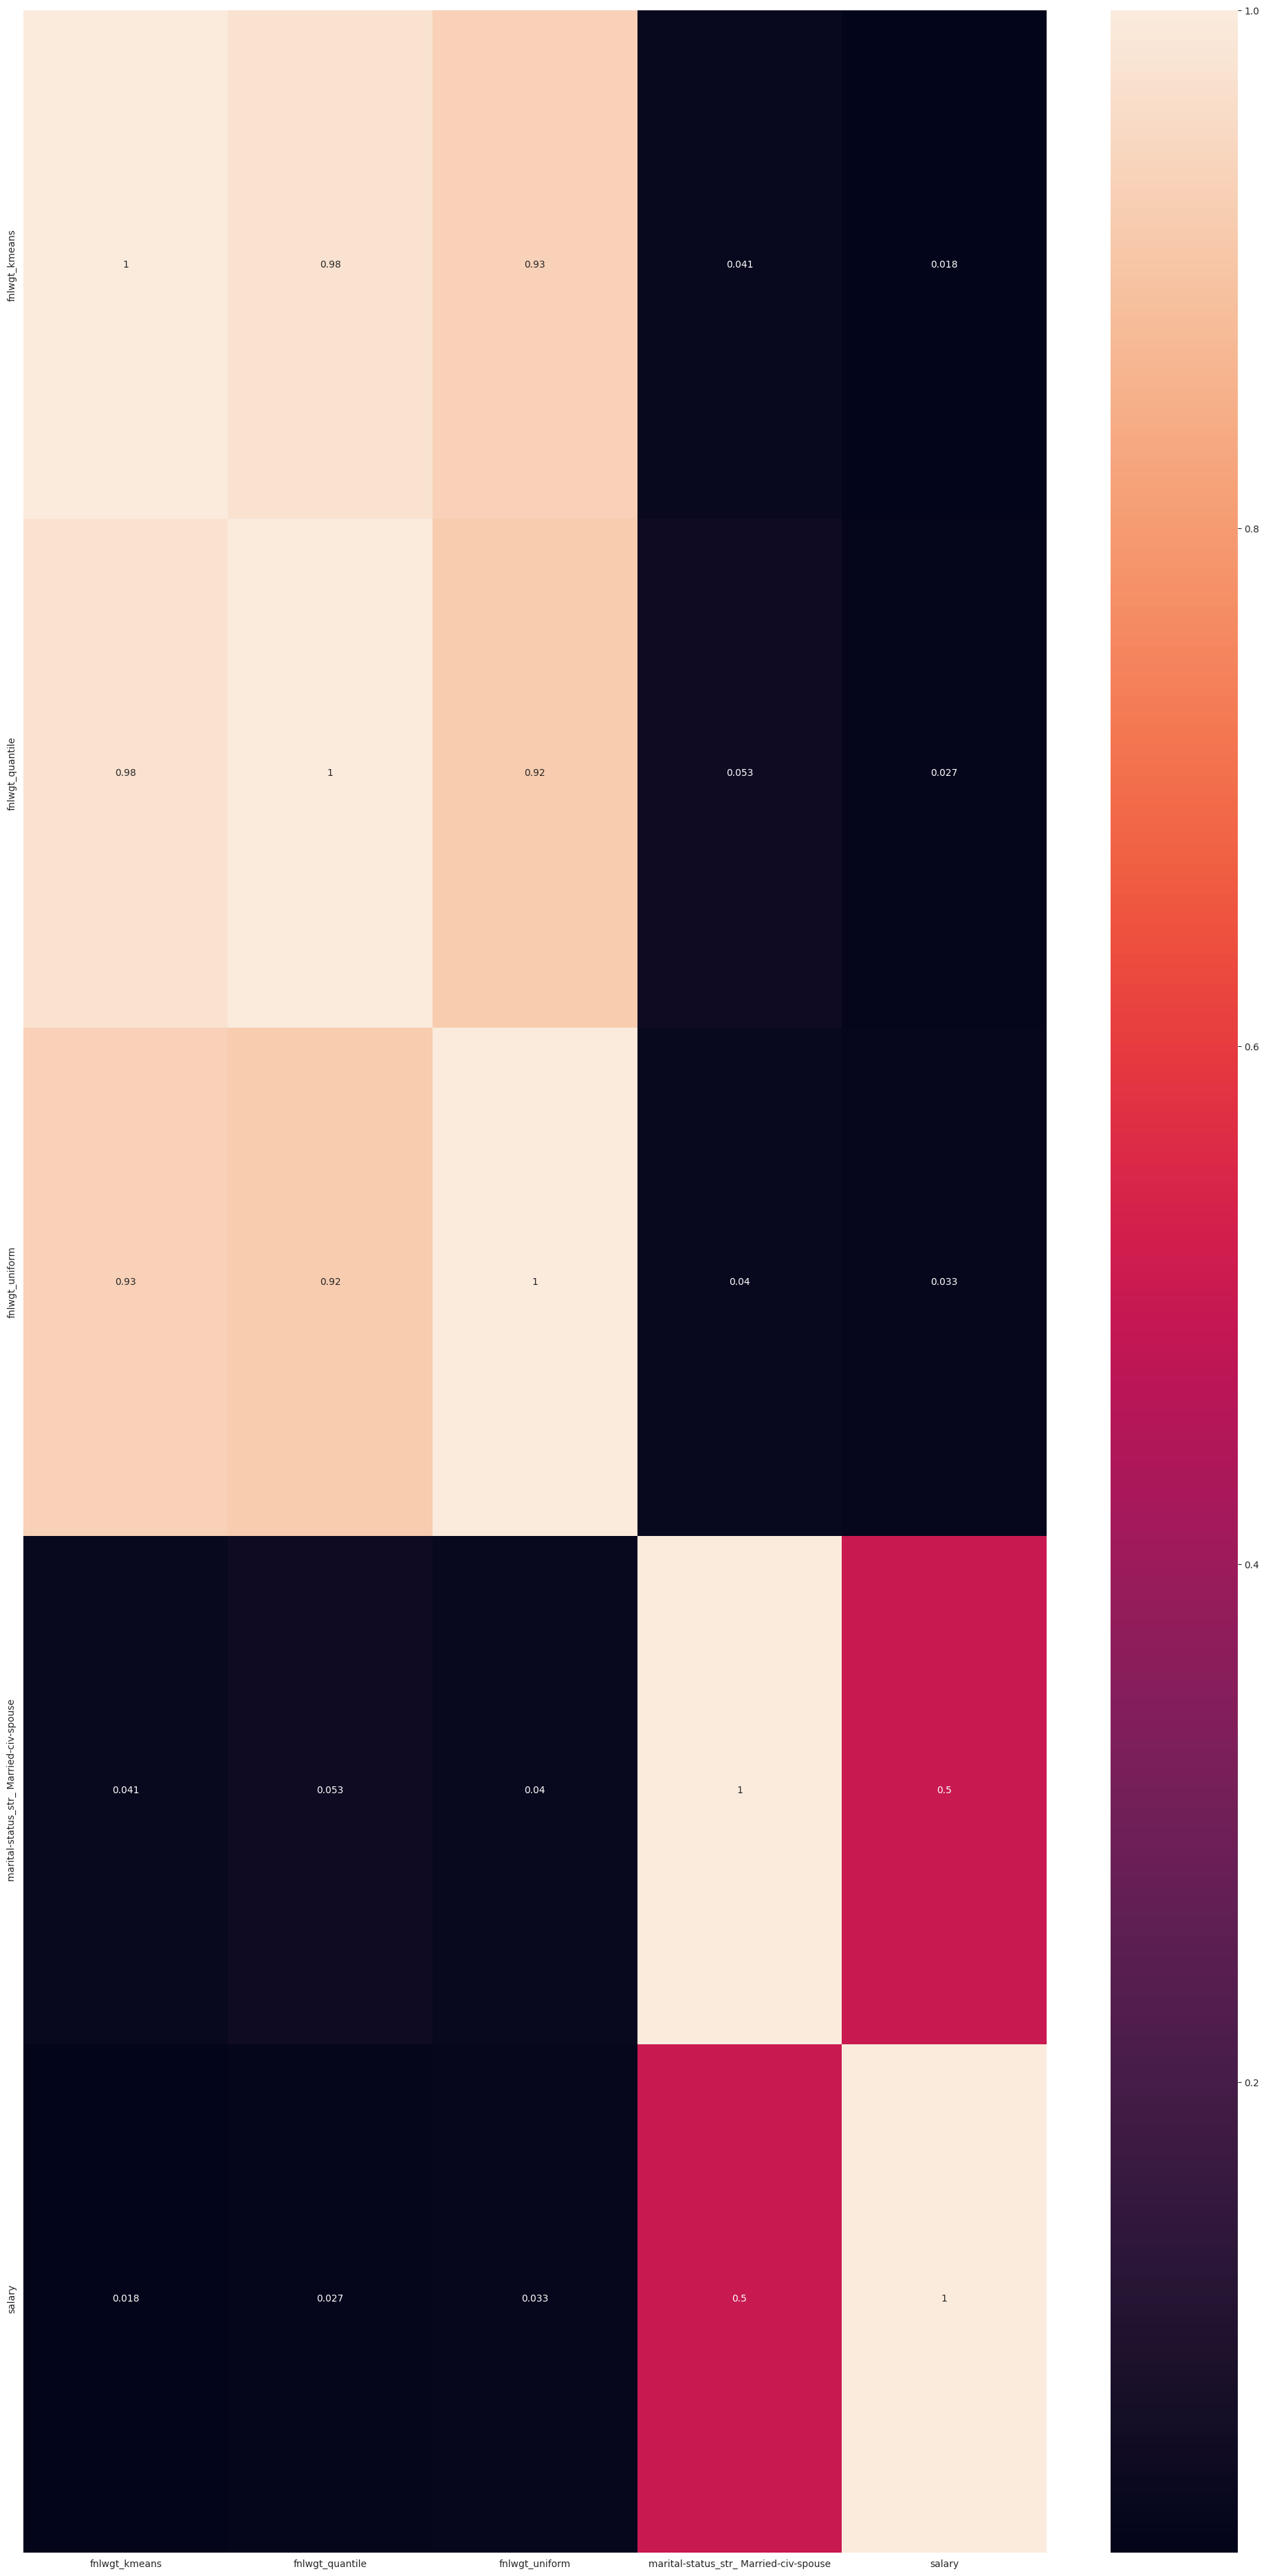

In [26]:
plt.rcParams["figure.figsize"] = (24,48)
newCorrData=pd.concat([X,newData],axis=1)
newCorrData=newCorrData[sorted(newCorrData.columns.tolist())]
sns.heatmap(pd.concat([newCorrData,y],axis=1).corr("spearman"),annot=True)

In [27]:
y.value_counts()

salary
0.0    513
1.0    513
Name: count, dtype: int64

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5; 1/1] START C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0.
[CV 1/5; 1/1] END C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0;, score=0.457 total time=  46.9s
[CV 2/5; 1/1] START C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0.
[CV 2/5; 1/1] END C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0;, score=0.518 total time=  16.7s
[CV 3/5; 1/1] START C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0.
[CV 3/5; 1/1] END C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0;, score=0.488 total time=  25.3s
[CV 4/5; 1/1] START C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0.
[CV 4/5; 1/1] END C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0;, score=0.421 total time=  36.5s
[CV 5/5; 1/1] START C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0.
[CV 5/5; 1/1] END C=0.01, degree=0, gamma=0.01, kernel=linear, random_state=0;, score=0.457 

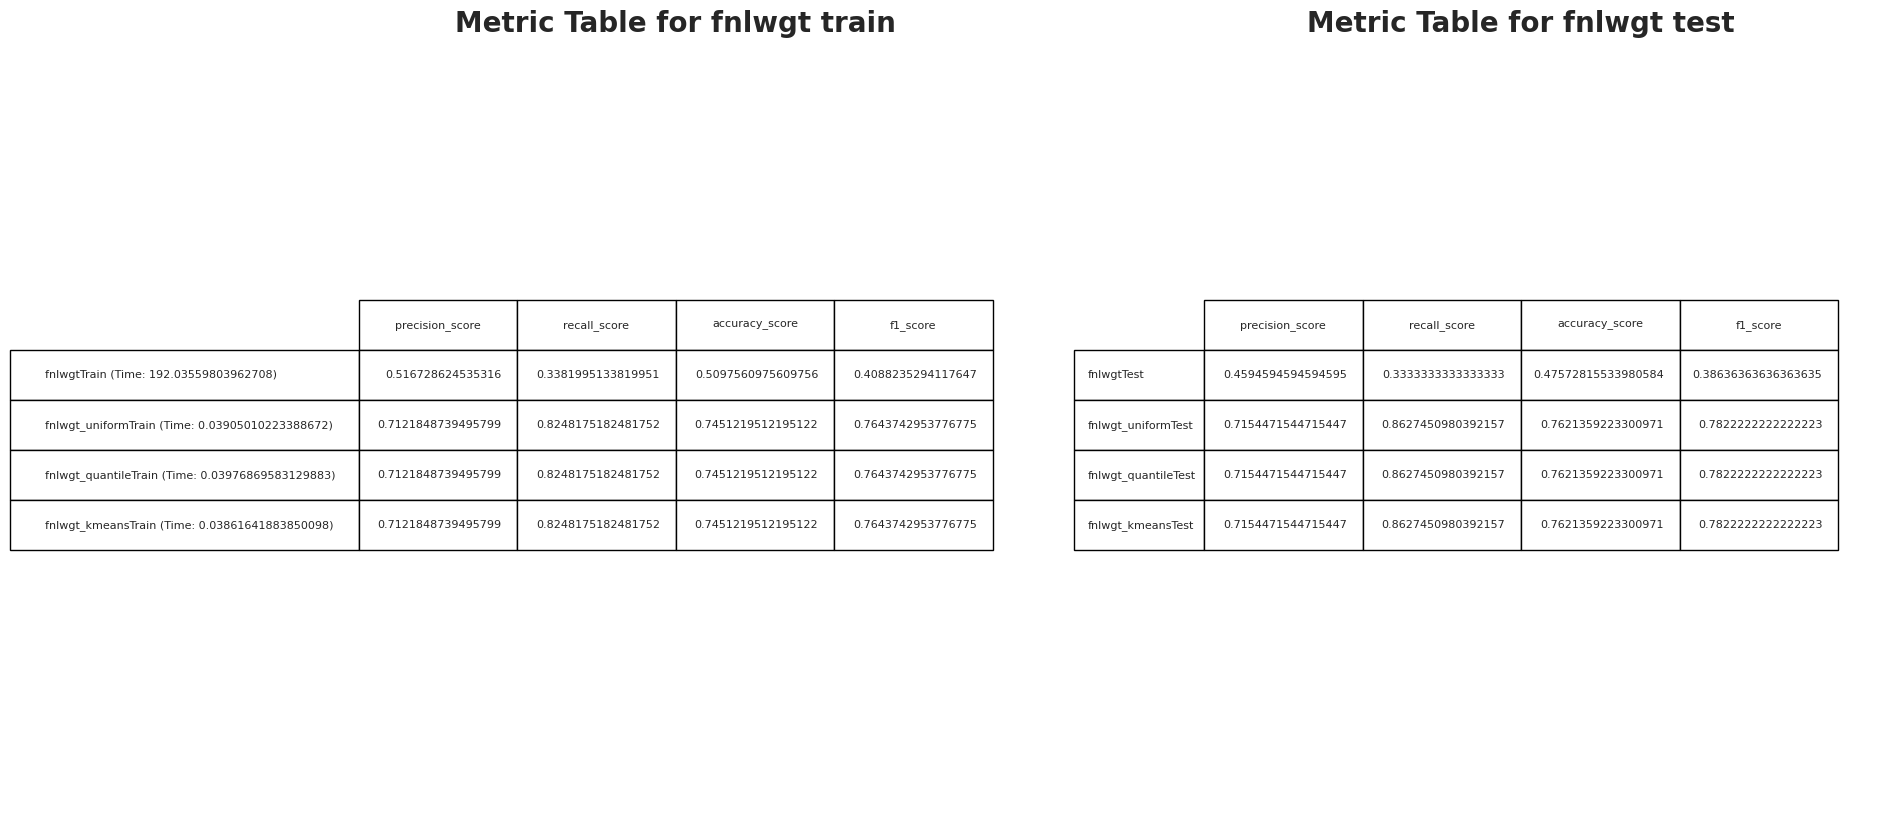

In [28]:

plt.rcParams["figure.figsize"] = (20,10)
fix, ax = plt.subplots(nrows=1, ncols=2)
kf = KFold(n_splits=5)
params = {
    "kernel" : ["linear"],
    "gamma" : [0.01],
    "C": [0.01],
    "degree" :[0],
    "random_state" :[0]
}
for i,col in enumerate(data2.columns):


    metrics=pd.DataFrame(columns=["precision_score","recall_score","accuracy_score","f1_score"])
    metrics1=pd.DataFrame(columns=["precision_score","recall_score","accuracy_score","f1_score"])
    metricsTest={"precision_score":[],"recall_score":[],"accuracy_score":[],"f1_score":[]}
    metricsTrain={"precision_score":[],"recall_score":[],"accuracy_score":[],"f1_score":[]}
    indexTrain=[]
    indexTest=[]
    X[col]=data2[col]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    start = time.time()
    grid_rf = GridSearchCV(SVC(),refit = True, verbose=50, param_grid=params, cv=KFold(n_splits=5), scoring="accuracy").fit(X_train, y_train)
    end = time.time()
    y_predTest = grid_rf.predict(X_test)
    y_predTrain= grid_rf.predict(X_train)

    metricsTest["recall_score"].append(recall_score(y_test, y_predTest))
    metricsTest["precision_score"].append(precision_score(y_test, y_predTest))
    metricsTest["f1_score"].append(f1_score(y_test, y_predTest))
    metricsTest["accuracy_score"].append(accuracy_score(y_test, y_predTest))

    metricsTrain["recall_score"].append(recall_score(y_train, y_predTrain))
    metricsTrain["precision_score"].append(precision_score(y_train, y_predTrain))
    metricsTrain["f1_score"].append(f1_score(y_train, y_predTrain))
    metricsTrain["accuracy_score"].append(accuracy_score(y_train, y_predTrain))

    indexTrain.append(col+"Train (Time: "+f'{end-start})')
    indexTest.append(col+"Test")

    X=X.drop(col,axis=1)
    for methods in ["uniform", "quantile", "kmeans"]:


        X[col+"_"+methods]=newData[col+"_"+methods]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
        start = time.time()
        grid_rf2 = GridSearchCV(SVC(),refit = True, verbose=50, param_grid=params, cv=KFold(n_splits=5), scoring="accuracy").fit(X_train, y_train)
        end = time.time()
        y_predTest = grid_rf2.predict(X_test)
        y_predTrain= grid_rf2.predict(X_train)

        metricsTest["recall_score"].append(recall_score(y_test, y_predTest))
        metricsTest["precision_score"].append(precision_score(y_test, y_predTest))
        metricsTest["f1_score"].append(f1_score(y_test, y_predTest))
        metricsTest["accuracy_score"].append(accuracy_score(y_test, y_predTest))

        metricsTrain["recall_score"].append(recall_score(y_train, y_predTrain))
        metricsTrain["precision_score"].append(precision_score(y_train, y_predTrain))
        metricsTrain["f1_score"].append(f1_score(y_train, y_predTrain))
        metricsTrain["accuracy_score"].append(accuracy_score(y_train, y_predTrain))

        indexTrain.append(col+"_"+methods+"Train (Time: "+f'{end-start})')
        indexTest.append(col+"_"+methods+"Test")

        X=X.drop(col+"_"+methods,axis=1)
    metrics=pd.DataFrame(metricsTrain)
    metrics1=pd.DataFrame(metricsTest)
    metrics.index=indexTrain
    metrics1.index=indexTest


    ax[0].axis("off")
    ax[0].axis('tight')
    ax[0].set_title(f"Metric Table for {col} train", weight='bold',fontsize=20)
    ax[0].table(cellText=metrics.to_numpy(),rowLabels=metrics.index.tolist(),colLabels=metrics.columns.tolist(),loc='center').scale(0.9,3)


    ax[1].axis("off")
    ax[1].axis('tight')
    ax[1].set_title(f"Metric Table for {col} test", weight='bold',fontsize=20)
    ax[1].table(cellText=metrics1.to_numpy(),rowLabels=metrics1.index.tolist(),colLabels=metrics1.columns.tolist(),loc='center').scale(0.9,3)